<a href="https://colab.research.google.com/github/tolgaenginn/Binary-Search/blob/main/ergasia_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUESTION 2

Install (!pip install) the following 4 libraries in order:

	◦	swig
	◦	gymnasium[box2d]
	◦	ray[rllib]
	◦	renderlab

In [1]:
!pip install swig


In [13]:
!pip install gymnasium[box2d]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398777 sha256=ec1922535977e3eab0755fa1e8d2a0487ee914f3013e243eee19f5fff230d905
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [14]:
!pip install ray[rllib]


In [15]:
!pip install renderlab


In [1]:
import gymnasium as gym
import ray
from ray.rllib.algorithms.ppo import PPOConfig
import renderlab

#QUESTION 3

Every gymnasium environment consists of three basic functions:

	◦	step
	◦	reset
	◦	render

Describe the functionality of each one.You may consult the documentation:https://www.gymlibrary.dev/content/basic_usage/

**reset()** initializes a new episode and returns the initial state.

**step(action)** applies an action, moves the simulation one step forward, and returns next state, reward, termination flags, and info.

**render()** visualizes the environment so we can observe the agent/environment behavior.

#QUESTION 4

State what the Observation Space and the Action Space of LunarLander-v2 are(e.g., Observation Space (State): 10×10 array and Action Space: 10 discrete actions).

In [2]:
#LunarLander-v2 does not work anymore
env = gym.make("LunarLander-v3")

print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)


Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Action Space: Discrete(4)


**Observation Space:**

The observation space of LunarLander-v3 is an 8 dimensional vector represented as a Box(8,). It includes the lander’s horizontal and vertical position, linear velocities, angle, angular velocity, and binary contact indicators for the left and right landing legs.

**Action Space:**

The action space is discrete with 4 possible actions: no action, firing the left orientation engine, firing the main engine, and firing the right orientation engine.

#QUESTION 5

Create an agent as shown in the code below. When the agent is created, the summary command (line 17) will print the policy model, which is an Actor-Critic network.Normally, the Actor-Critic architecture defines two separate networks, but it can also be implemented using one network with two branches:

  - one for the policy values,
  - one for the value function.
  - Describe the Neural Network that is created.



In [3]:
import ray
from ray.rllib.algorithms.ppo import PPOConfig
import gymnasium as gym

ray.shutdown()
ray.init(ignore_reinit_error=True)

config = (
    PPOConfig()
    .environment(env="LunarLander-v3")
    .framework("torch")
    .resources(num_gpus=1)
    .env_runners(num_env_runners=0)
    .training(
        model={
            "fcnet_hiddens": [256, 256],
            "fcnet_activation": "tanh",
            "vf_share_layers": False,
        }
    )
)

algo = config.build()
print("Agent successfully created")


2026-01-14 12:17:51,721	INFO worker.py:2007 -- Started a local Ray instance.
  warnings.warn(

2026-01-14 12:18:01,001	WARNING ipython-input-413730951.py:23 -- DeprecationWarning: `build` has been deprecated. Use `AlgorithmConfig.build_algo` instead. This will raise an error in the future!
2026-01-14 12:18:01,006	WARNING algorithm_config.py:5118 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
2026-01-14 12:18:01,643	WARNING rl_module.py:459 -- DeprecationWarning: `RLModule(config=[RLModuleConfig object])` has been deprecated. Use `RLModule(observation_space=.., action_space=.., inference_only=.., model_config=.., catalog_class=..)` instead. This will raise an error in the future!
202

Agent successfully created


#QUESTION 6

Create a training loop to train your agent. A sample solution is provided below. Then, display the average rewards per training iteration.How can you tell whether the agent is learning? Answer this question.


(pid=gcs_server) [2026-01-14 12:18:17,954 E 4172 4172] (gcs_server) gcs_server.cc:303: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


Iter 001: mean episode reward = -217.18665312267993


(raylet) [2026-01-14 12:18:21,668 E 4257 4257] (raylet) main.cc:1032: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(pid=4294) [2026-01-14 12:18:30,897 E 4294 4376] core_worker_process.cc:842: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
  return np.nanmean(self._values_to_merge)



Iter 002: mean episode reward = -174.49825385143268
Iter 003: mean episode reward = -123.32112708177092
Iter 004: mean episode reward = -120.54648924410557
Iter 005: mean episode reward = -110.87412515963003
Iter 006: mean episode reward = -102.23188986451541
Iter 007: mean episode reward = -83.75265852819301
Iter 008: mean episode reward = -84.49542288068764
Iter 009: mean episode reward = -89.24290558908599
Iter 010: mean episode reward = -60.07078489615712
Iter 011: mean episode reward = -44.286207933042945
Iter 012: mean episode reward = -48.93374126694093
Iter 013: mean episode reward = -37.76787038377255
Iter 014: mean episode reward = -30.242620060847837
Iter 015: mean episode reward = -28.134020384577518
Iter 016: mean episode reward = 1.1235305468441672
Iter 017: mean episode reward = -10.076558200764989
Iter 018: mean episode reward = -2.3629478079866746
Iter 019: mean episode reward = 2.0259604291104893
Iter 020: mean episode reward = 2.1233672782646984
Iter 021: mean episod

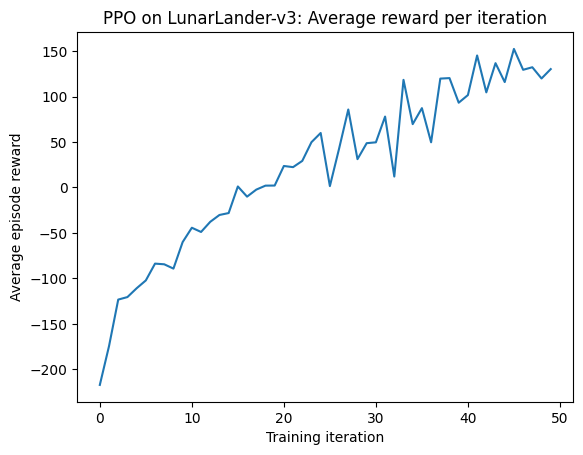

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rewards = []
iterations = 50

for i in range(iterations):
    result = algo.train()

    mean_reward = (
        result.get("env_runners", {}).get("episode_return_mean", None)
        or result.get("episode_reward_mean", None)
        or result.get("sampler_results", {}).get("episode_reward_mean", None)
    )

    rewards.append(mean_reward)
    print(f"Iter {i+1:03d}: mean episode reward = {mean_reward}")


plt.figure()
plt.plot(rewards)
plt.xlabel("Training iteration")
plt.ylabel("Average episode reward")
plt.title("PPO on LunarLander-v3: Average reward per iteration")
plt.show()


The agent is learning when reward increases over training iterations and becomes more stable. In the beginning, rewards are low because the agent crashes often or wastes fuel. As training goes on, the mean reward increases because the agent learns to control.